In [ ]:
#system modules
import os
import itertools
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#pre-processing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#deep learning modules
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Training set
## Get paths of the Training directory
Training = "/content/drive/MyDrive/SkinAI/train"
imgpaths = []
labels =[]
tr_dir = os.listdir(Training) #convert directories to list

## Get paths and labels of classes and images in Training directory
for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        imgpaths.append(imgpath)
        labels.append(i)

## Create the data frame
Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')
Tr_data = pd.concat([Paths, Labels], axis = 1)

In [ ]:
# Testing set
Testing = "/content/drive/MyDrive/SkinAI/test"
imgpaths = []
labels =[]
ts_dir = os.listdir(Testing) #convert directories to list

## Get paths and labels of classes and images in Testing directory
for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        imgpaths.append(imgpath)
        labels.append(i)

## Create the data frame
Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')
Ts_data = pd.concat([Paths, Labels], axis = 1)

In [ ]:
Tr_data.shape

(3842, 2)

In [ ]:
Tr_data.head()

Paths  \
0  /content/drive/MyDrive/SkinAI/train/Melanoma S...   
1  /content/drive/MyDrive/SkinAI/train/Melanoma S...   
2  /content/drive/MyDrive/SkinAI/train/Melanoma S...   
3  /content/drive/MyDrive/SkinAI/train/Melanoma S...   
4  /content/drive/MyDrive/SkinAI/train/Melanoma S...   

                                Labels  
0  Melanoma Skin Cancer Nevi and Moles  
1  Melanoma Skin Cancer Nevi and Moles  
2  Melanoma Skin Cancer Nevi and Moles  
3  Melanoma Skin Cancer Nevi and Moles  
4  Melanoma Skin Cancer Nevi and Moles

In [ ]:
Ts_data.shape

(942, 2)

In [ ]:
Ts_data.head()

Paths  \
0  /content/drive/MyDrive/SkinAI/test/Melanoma Sk...   
1  /content/drive/MyDrive/SkinAI/test/Melanoma Sk...   
2  /content/drive/MyDrive/SkinAI/test/Melanoma Sk...   
3  /content/drive/MyDrive/SkinAI/test/Melanoma Sk...   
4  /content/drive/MyDrive/SkinAI/test/Melanoma Sk...   

                                Labels  
0  Melanoma Skin Cancer Nevi and Moles  
1  Melanoma Skin Cancer Nevi and Moles  
2  Melanoma Skin Cancer Nevi and Moles  
3  Melanoma Skin Cancer Nevi and Moles  
4  Melanoma Skin Cancer Nevi and Moles

In [ ]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(471, 2)
(471, 2)


In [ ]:
# Define hyperparameters
batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

#Create generators
Tr_G = ImageDataGenerator(fill_mode='nearest')
Val_G = ImageDataGenerator()
Test_G = ImageDataGenerator()

In [ ]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 3842 validated image filenames belonging to 3 classes.


In [ ]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)


Found 471 validated image filenames belonging to 3 classes.


In [ ]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)


Found 471 validated image filenames belonging to 3 classes.


In [ ]:
L_index = Train.class_indices
L_index

{'Acne and Rosacea Photos': 0,
 'Light Diseases and Disorders of Pigmentation': 1,
 'Melanoma Skin Cancer Nevi and Moles': 2}

In [ ]:
Keys = list(L_index.keys())
Keys

['Acne and Rosacea Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Melanoma Skin Cancer Nevi and Moles']

In [ ]:
imgs, labels = next(Train)

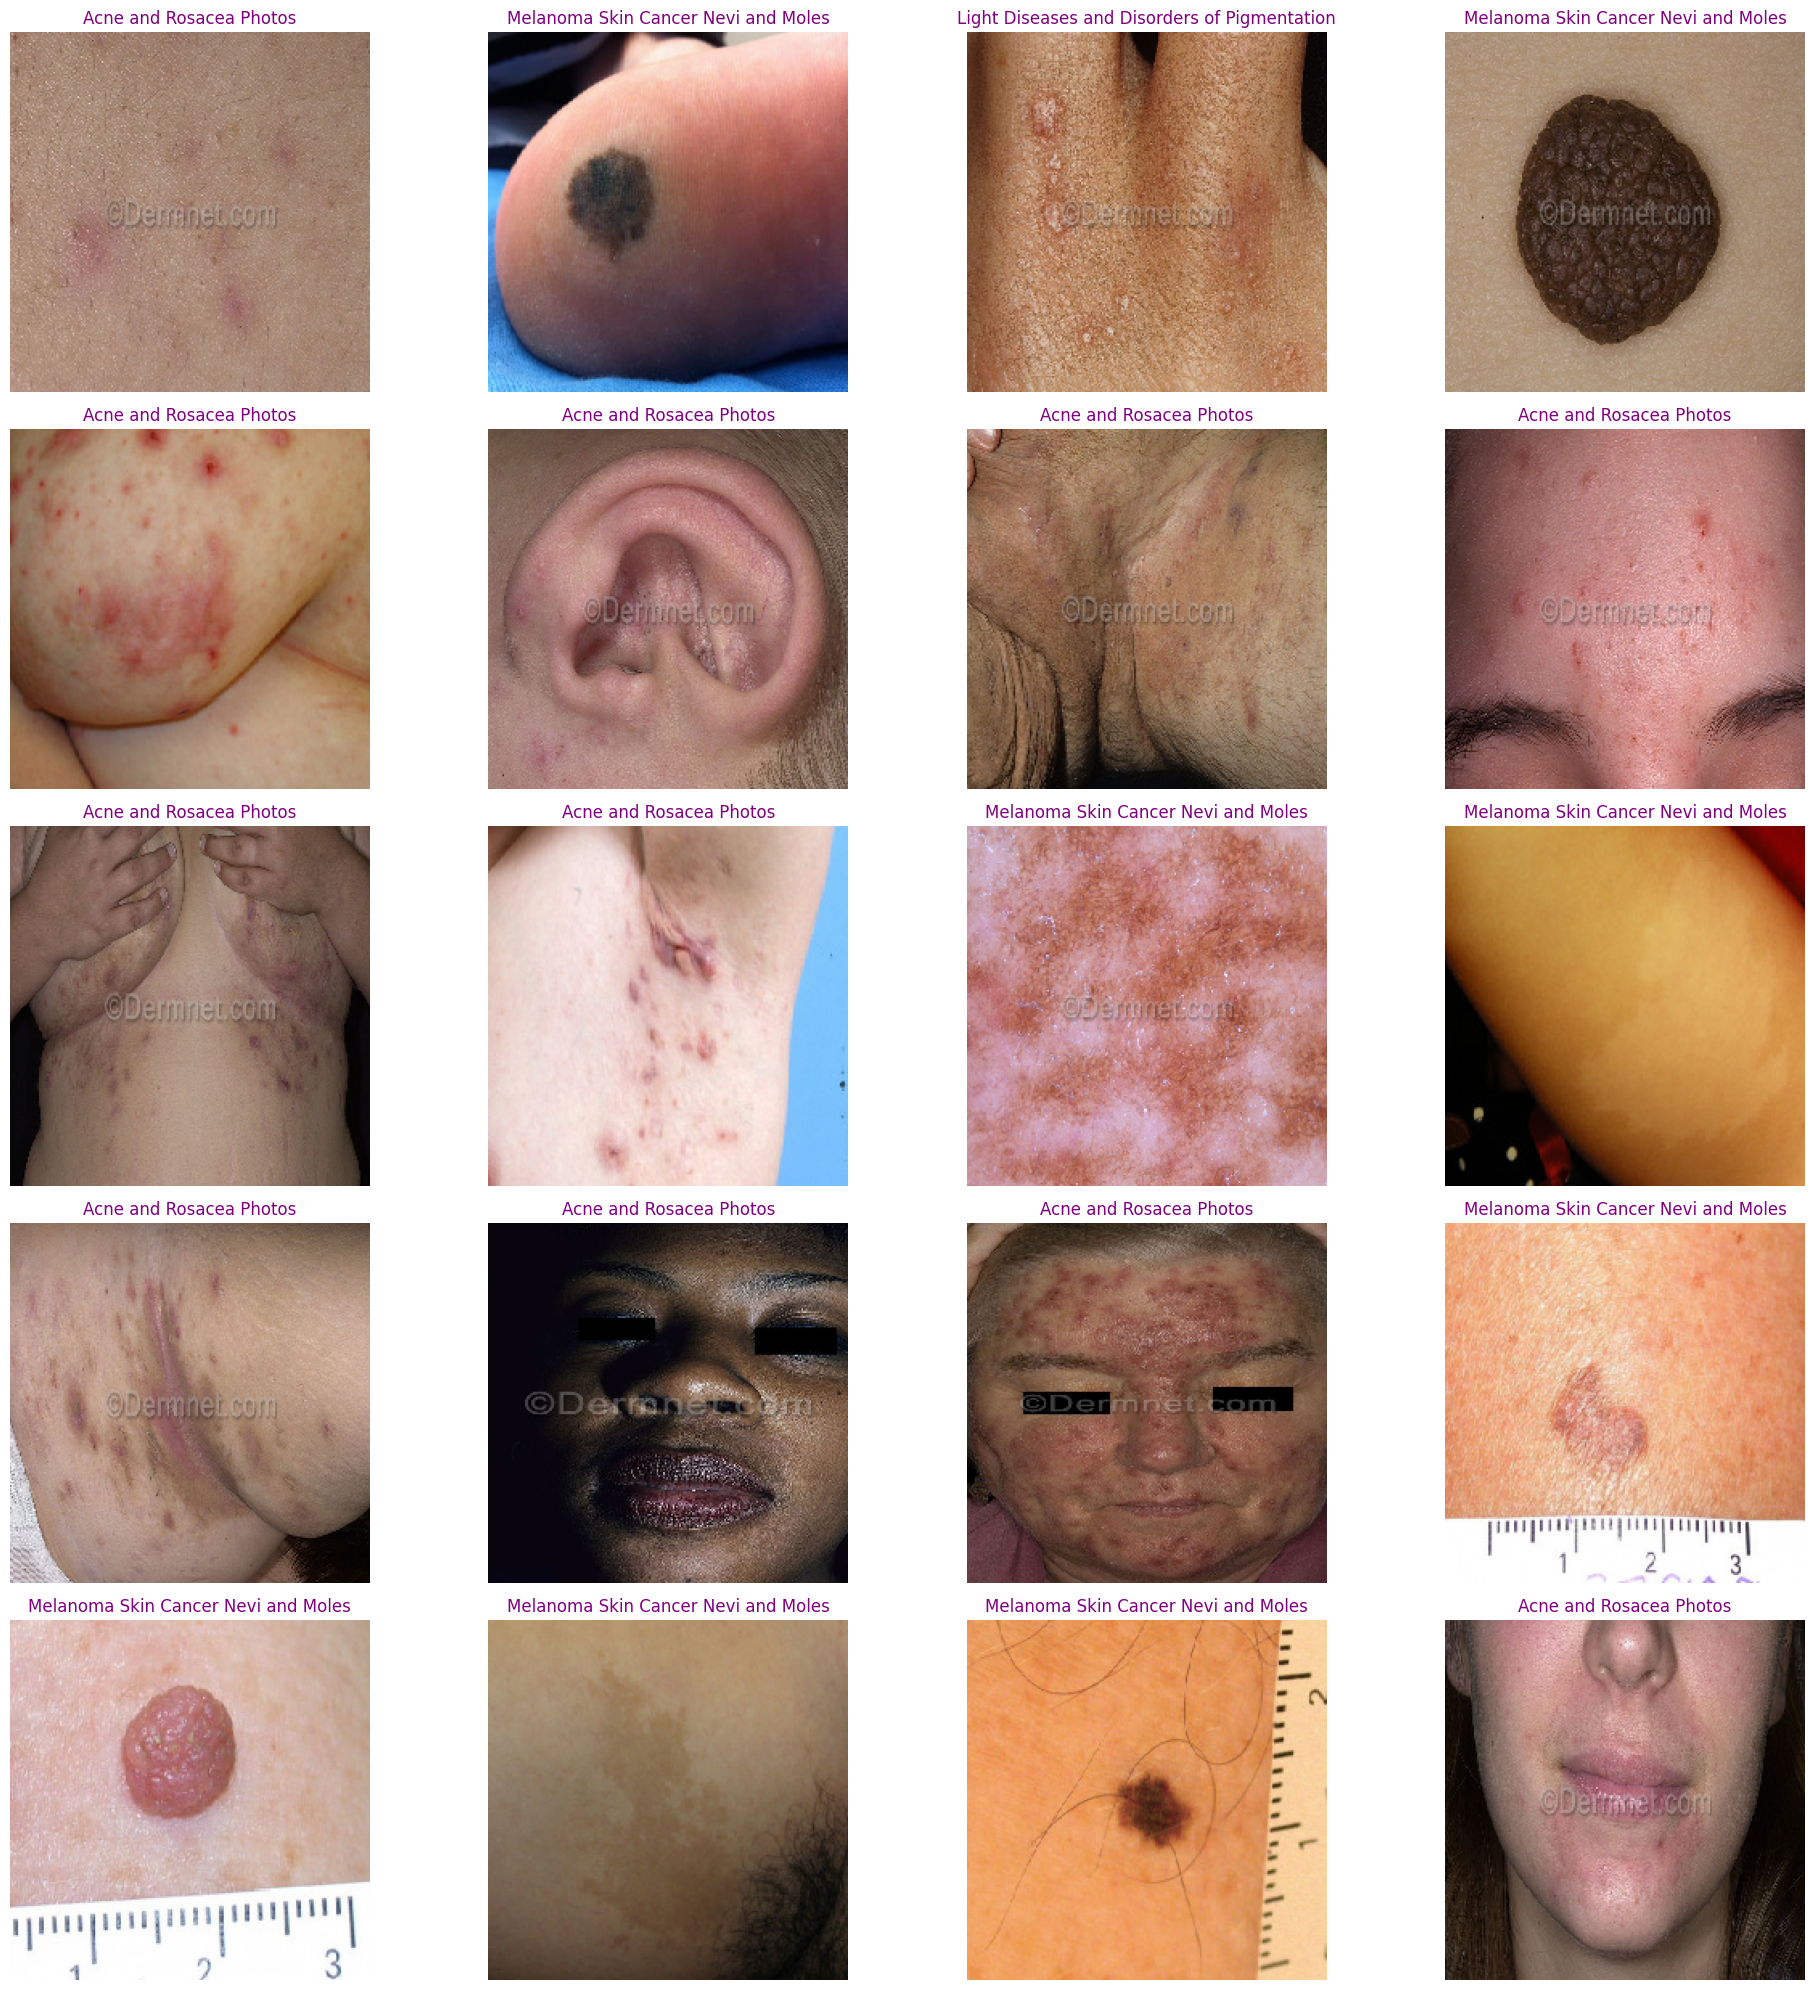

In [ ]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
Train


In [ ]:
# Define number of classes
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

3

In [ ]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(counter_classes, activation = 'softmax')
])

In [ ]:
# Model Compilation
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# Get summary
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     590080    
                                                        

In [ ]:
Train

In [ ]:
epochs = 15

history = CNN.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15
193/193 [==============================] - 1057s 5s/step - loss: 1.3046 - accuracy: 0.4487 - val_loss: 0.9633 - val_accuracy: 0.5690
Epoch 2/15
193/193 [==============================] - 139s 718ms/step - loss: 0.9545 - accuracy: 0.5500 - val_loss: 0.9500 - val_accuracy: 0.5987
Epoch 3/15
193/193 [==============================] - 137s 711ms/step - loss: 0.9291 - accuracy: 0.5695 - val_loss: 1.0753 - val_accuracy: 0.4989
Epoch 4/15
193/193 [==============================] - 138s 715ms/step - loss: 0.8988 - accuracy: 0.5911 - val_loss: 1.1022 - val_accuracy: 0.5011
Epoch 5/15
193/193 [==============================] - 137s 710ms/step - loss: 0.8643 - accuracy: 0.6135 - val_loss: 1.1795 - val_accuracy: 0.4225
Epoch 6/15
193/193 [==============================] - 142s 734ms/step - loss: 0.8334 - accuracy: 0.6374 - val_loss: 1.1458 - val_accuracy: 0.5074
Epoch 7/15
193/193 [==============================] - 141s 731ms/step - loss: 0.8020 - accuracy: 0.6583 - val_loss: 1.2755 - v

In [ ]:
# accuracy and loss of Train
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid
v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index
index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index
index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values
Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch
best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

In [ ]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.448724627494812, 0.5499739646911621, 0.5694950819015503, 0.5910983681678772, 0.6134825348854065, 0.6374284029006958, 0.6582509279251099, 0.6725663542747498, 0.6944299936294556, 0.7313898801803589, 0.7649661898612976, 0.8027068972587585, 0.8365434408187866, 0.8706402778625488, 0.8774076104164124]


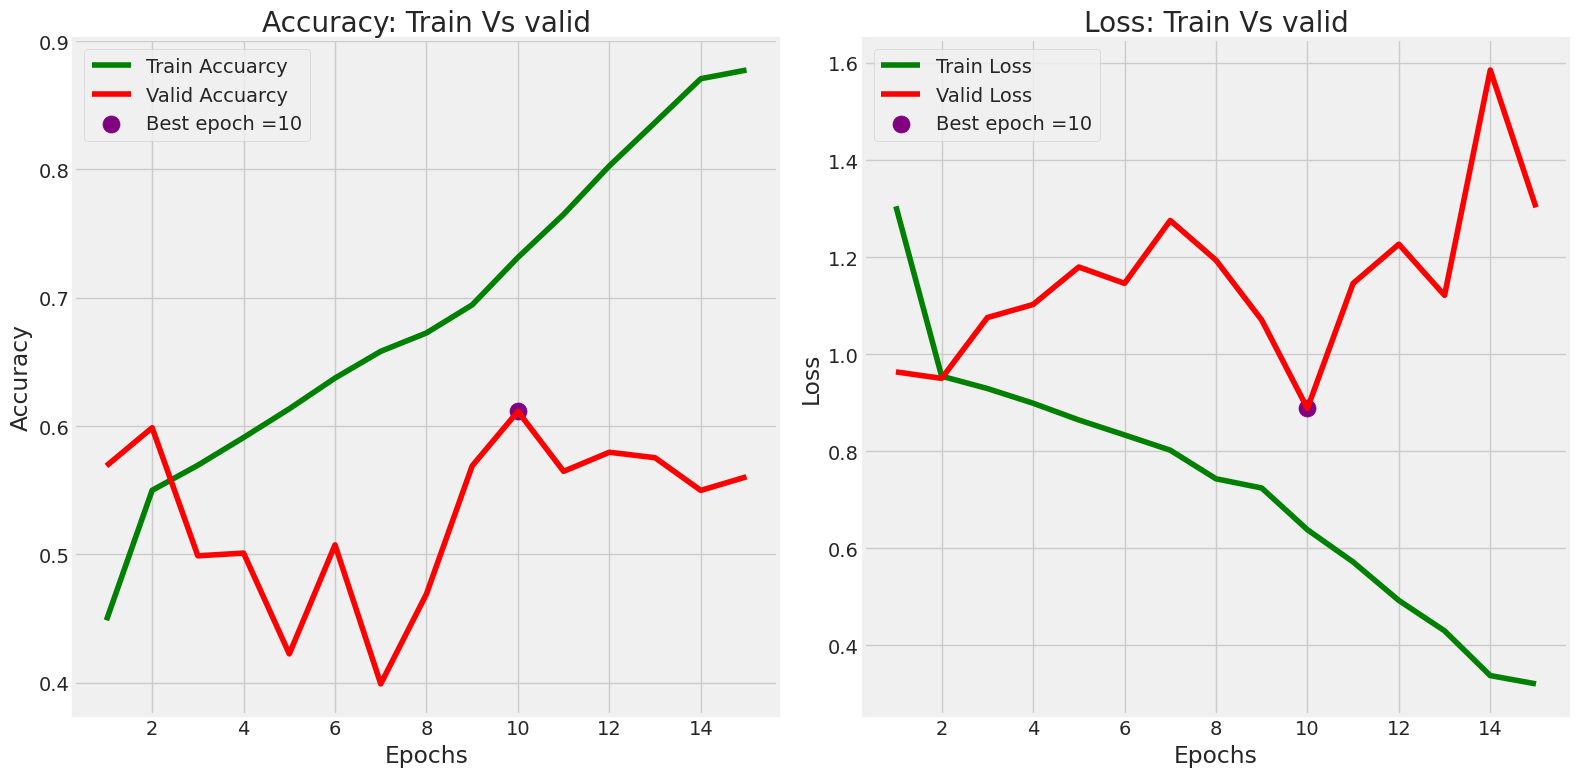

In [ ]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Define Vars
Train_sc = CNN.evaluate(Train, verbose = 0)
Valid_sc = CNN.evaluate(Valid, verbose = 0)
Test_sc =CNN.evaluate(Test, verbose = 0)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9141072630882263 
      Loss:  0.2434072494506836 
________________________
Valid Scores : 
    accuracy: 0.5605095624923706 
      Loss:  1.302445888519287 
________________________
Test Scores : 
    accuracy: 0.5647558569908142 
      Loss:  1.3970633745193481 
________________________


In [ ]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[0.98650557 0.0099679  0.00352649]
 [0.92326593 0.05530424 0.02142981]
 [0.6251871  0.3283251  0.04648782]
 ...
 [0.76870453 0.10350639 0.12778905]
 [0.68644845 0.24859688 0.06495467]
 [0.00254683 0.01309801 0.9843552 ]]
[0 0 0 0 0 0 2 2 1 2 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 2 2 0 1 2 0 0 0 0 0 2 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 2 0 0 0 1 1 0 0 1 1 0 2 1 1 1 0 0 2 2 2 0 1
 2 2 0 1 0 0 2 0 2 0 2 0 0 2 2 1 2 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 2 0 1 0 1
 1 1 0 2 0 2 2 0 1 0 1 0 0 0 1 0 0 2 0 0 0 0 0 1 0 1 0 2 0 1 2 2 2 2 0 2 2
 2 2 0 0 0 0 2 2 2 2 0 0 1 2 0 0 0 2 0 1 1 2 0 0 0 0 2 0 2 0 0 0 2 0 2 1 0
 0 0 1 2 1 2 0 0 2 0 0 2 2 0 2 0 1 2 1 0 0 2 0 0 2 1 1 0 0 0 0 2 0 0 0 1 0
 2 0 2 0 0 0 0 2 1 1 2 0 0 0 0 2 0 1 0 0 0 2 1 0 2 1 0 0 0 2 1 0 0 0 0 0 2
 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 1 1 1 2 0
 0 0 0 2 0 1 2 0 0 1 2 1 0 1 0 0 2 2 1 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 1 2 1
 0 1 1 0 2 2 1 0 0 0 1 0 0 2 1 2 0 2 2 0 2 1 1 2 0 2 0 1 0 2 0 0 0 0 1 0 2
 1 2 2 2 2 1 0 1 0 0 0 2 0 0

In [ ]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices

# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[181,  52,  35],
       [ 41,  31,  25],
       [ 32,  20,  54]])

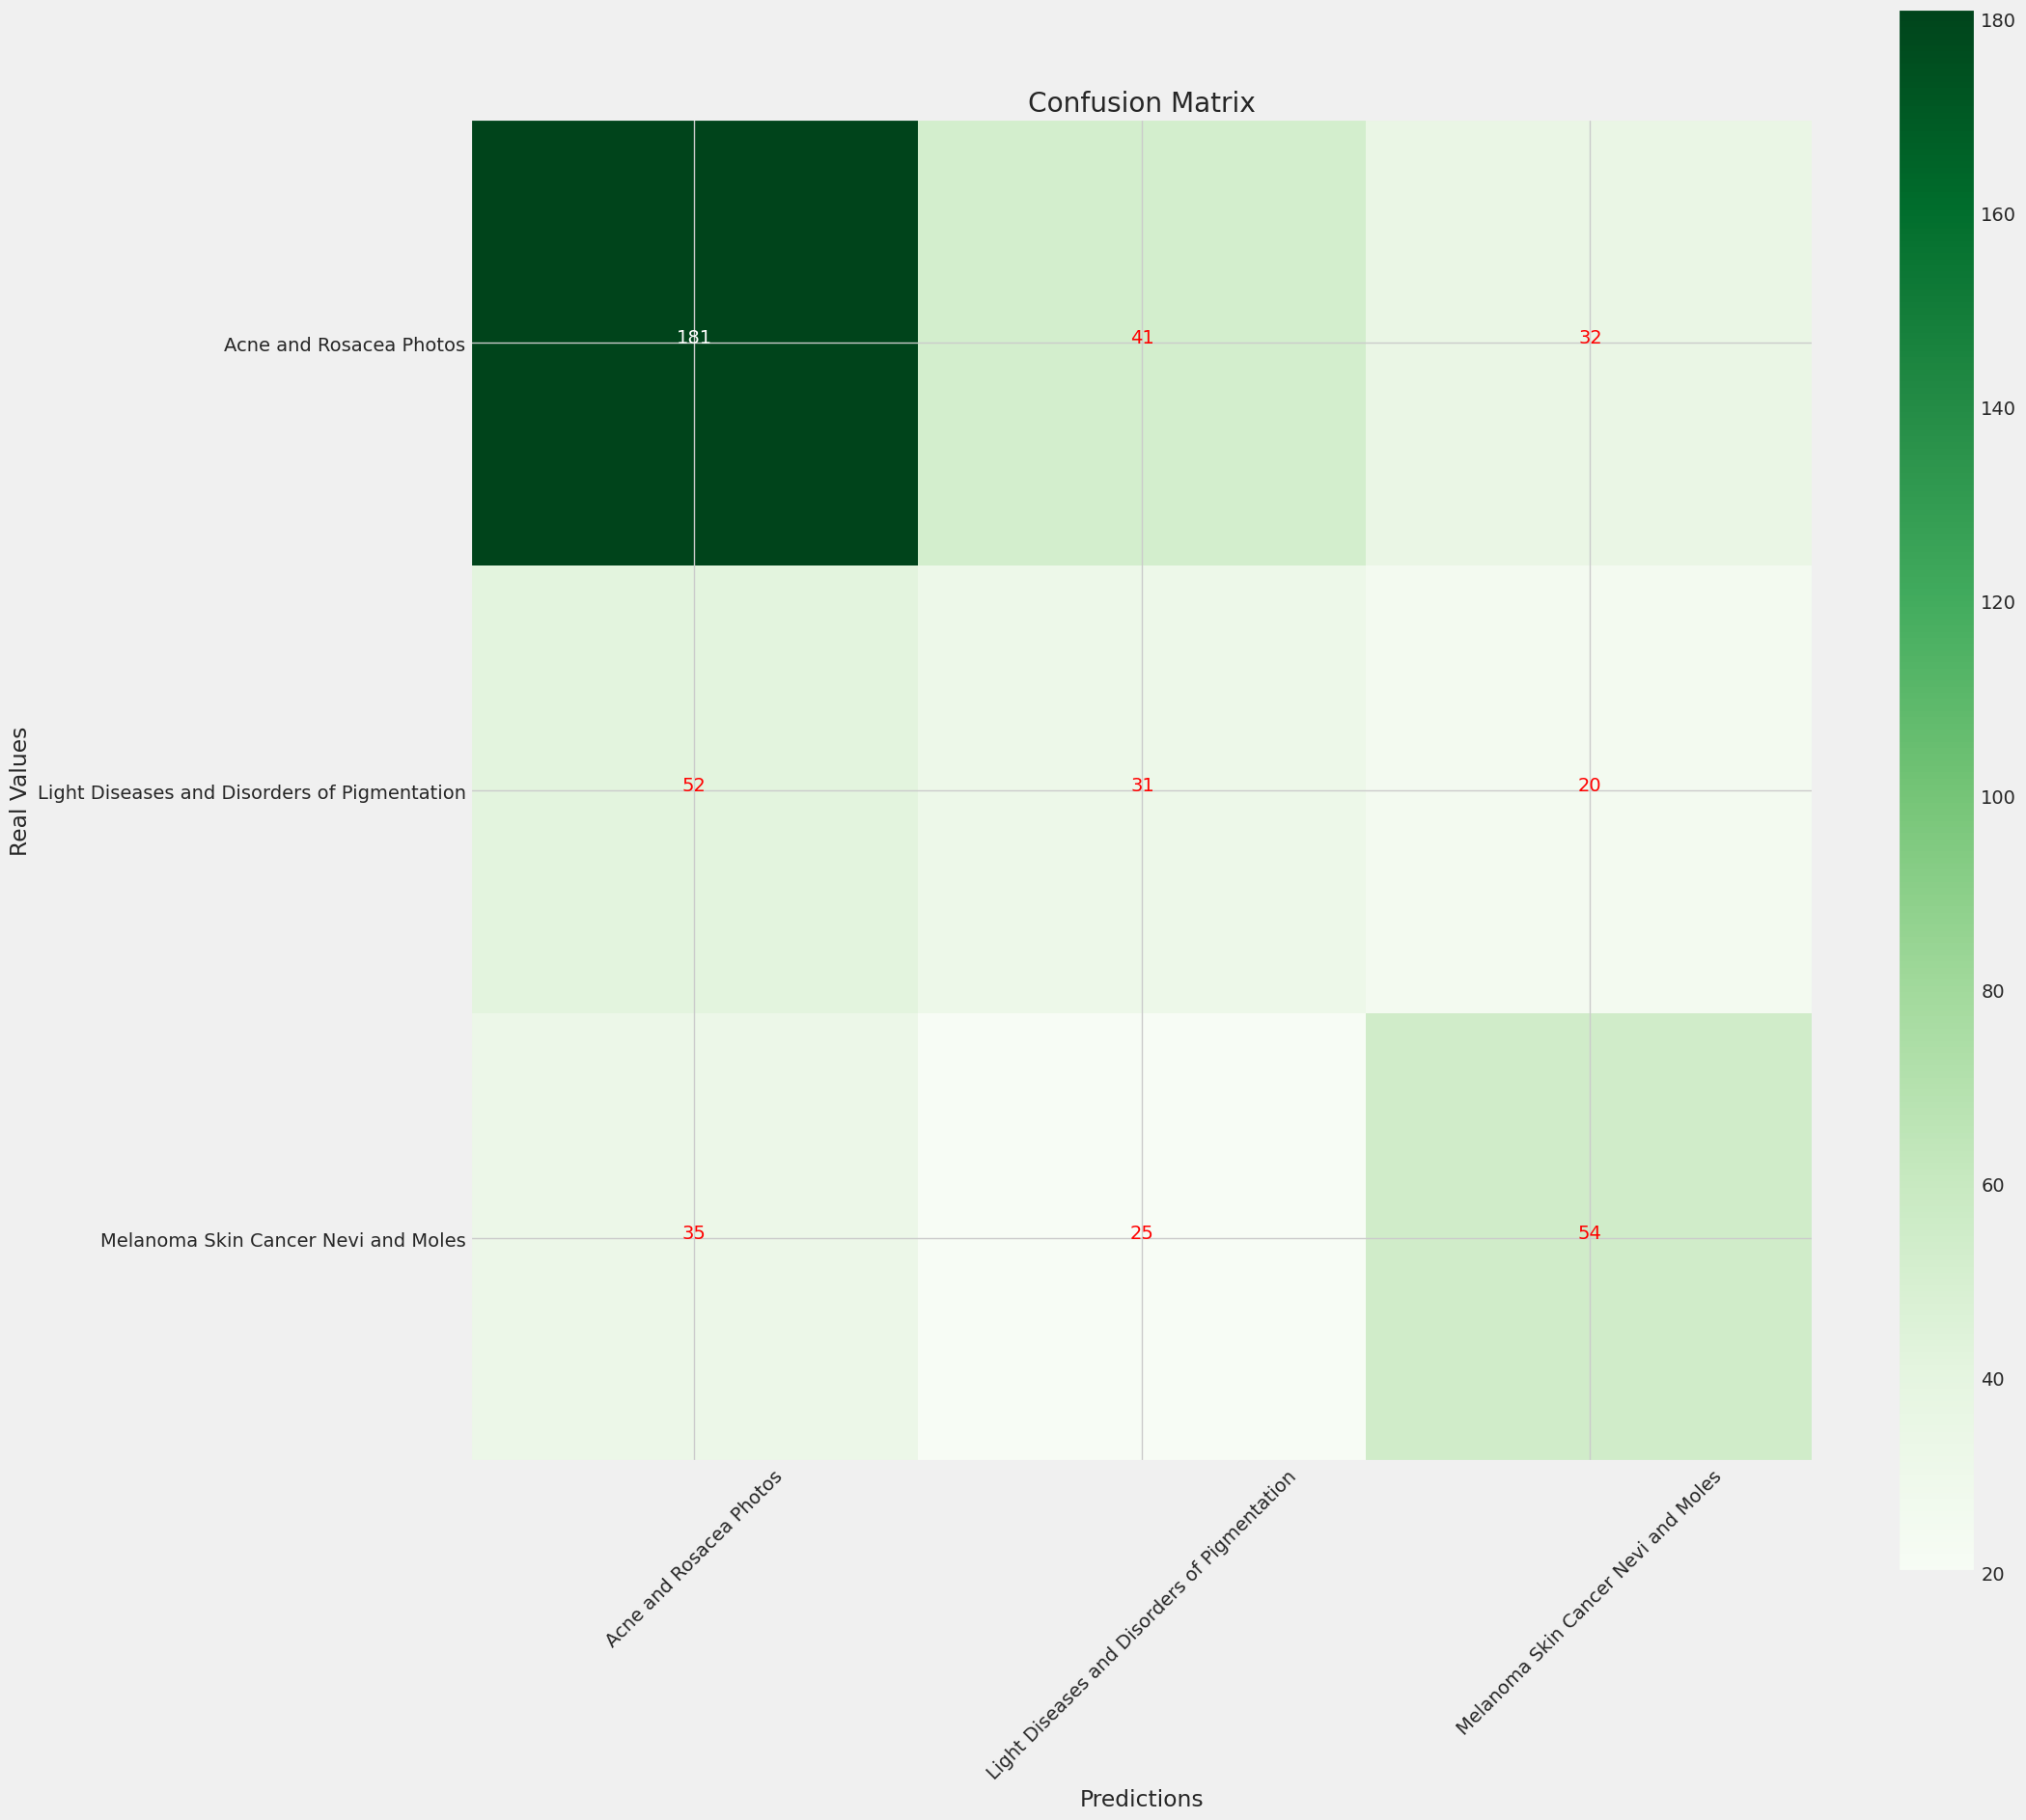

In [ ]:
#visualise it
plt.figure(figsize =(20, 20))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')

plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [ ]:
CNN.save('model.h5')